In [1]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set style untuk visualisasi
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✓ Libraries berhasil di-import!")


✓ Libraries berhasil di-import!


In [ ]:
# Load Data
df = pd.read_csv('insurance.csv')

print("Data berhasil dimuat!")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

# Tampilkan 10 baris pertama
df.head(10)

Data berhasil dimuat!
Jumlah baris: 1338
Jumlah kolom: 7


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
print("Informasi Dataset:")
print("=" * 50)
df.info()
print("\n" + "=" * 50)
print("Statistik Deskriptif:")
print("=" * 50)
df.describe()

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

Statistik Deskriptif:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
# Cell 5: Cek Missing Values
print("Cek Missing Values:")
print("=" * 50)
missing = df.isnull().sum()
print(missing)
print("\n" + "=" * 50)
if missing.sum() == 0:
    print("✓ Tidak ada missing values!")
else:
    print("⚠ Ada missing values yang perlu ditangani")

Cek Missing Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

✓ Tidak ada missing values!


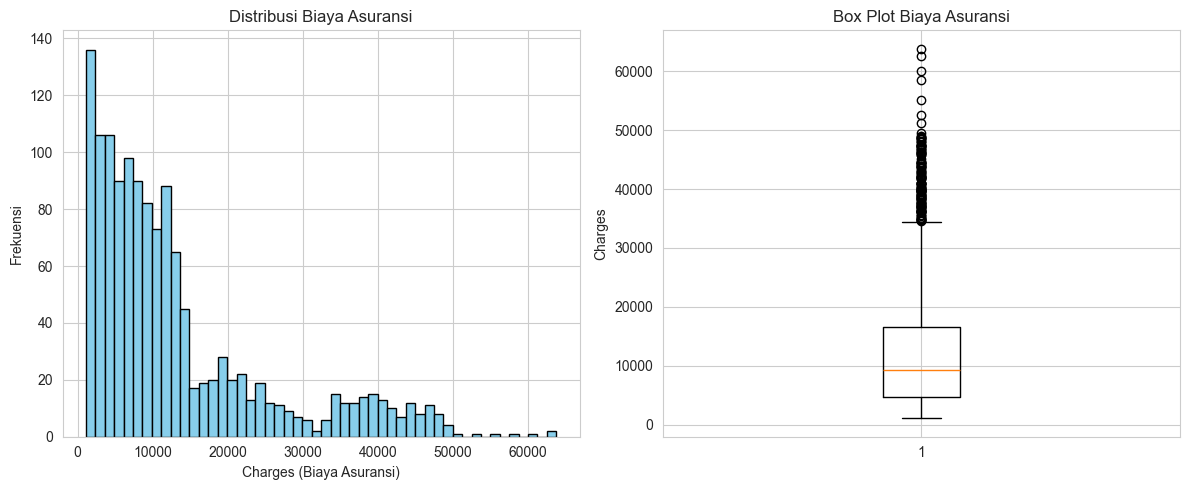

Rata-rata biaya: $13270.42
Median biaya: $9382.03
Biaya terendah: $1121.87
Biaya tertinggi: $63770.43


In [6]:
# Exploratory Data Analysis - Distribusi Charges (EDA)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['charges'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Charges (Biaya Asuransi)')
plt.ylabel('Frekuensi')
plt.title('Distribusi Biaya Asuransi')

plt.subplot(1, 2, 2)
plt.boxplot(df['charges'])
plt.ylabel('Charges')
plt.title('Box Plot Biaya Asuransi')

plt.tight_layout()
plt.show()

print(f"Rata-rata biaya: ${df['charges'].mean():.2f}")
print(f"Median biaya: ${df['charges'].median():.2f}")
print(f"Biaya terendah: ${df['charges'].min():.2f}")
print(f"Biaya tertinggi: ${df['charges'].max():.2f}")


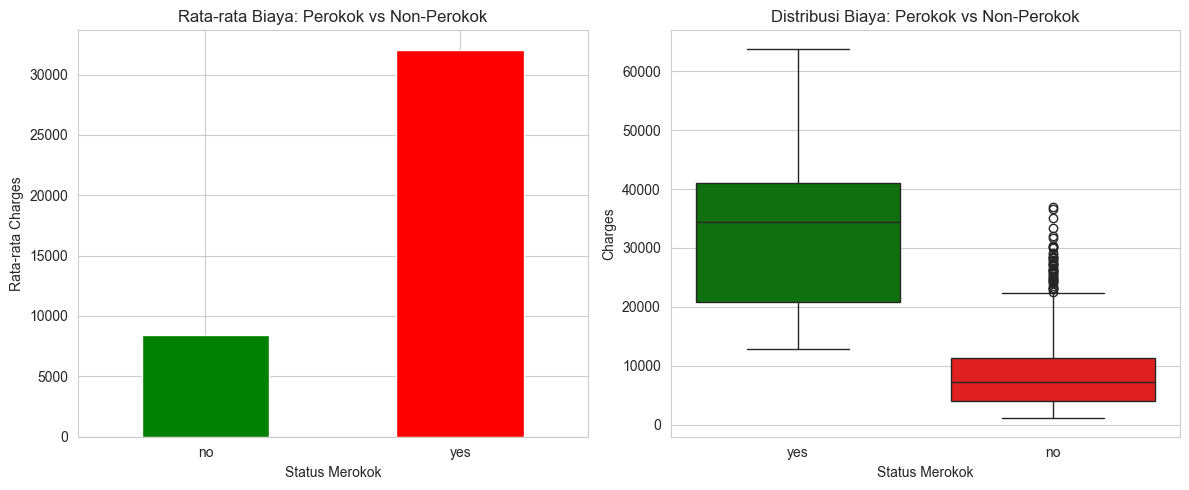

Rata-rata biaya berdasarkan status merokok:
smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64


In [8]:
#Analisis Smoker vs Charges
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df.groupby('smoker')['charges'].mean().plot(kind='bar', color=['green', 'red'])
plt.xlabel('Status Merokok')
plt.ylabel('Rata-rata Charges')
plt.title('Rata-rata Biaya: Perokok vs Non-Perokok')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='smoker', y='charges', palette=['green', 'red'])
plt.xlabel('Status Merokok')
plt.ylabel('Charges')
plt.title('Distribusi Biaya: Perokok vs Non-Perokok')

plt.tight_layout()
plt.show()

print("Rata-rata biaya berdasarkan status merokok:")
print(df.groupby('smoker')['charges'].mean())

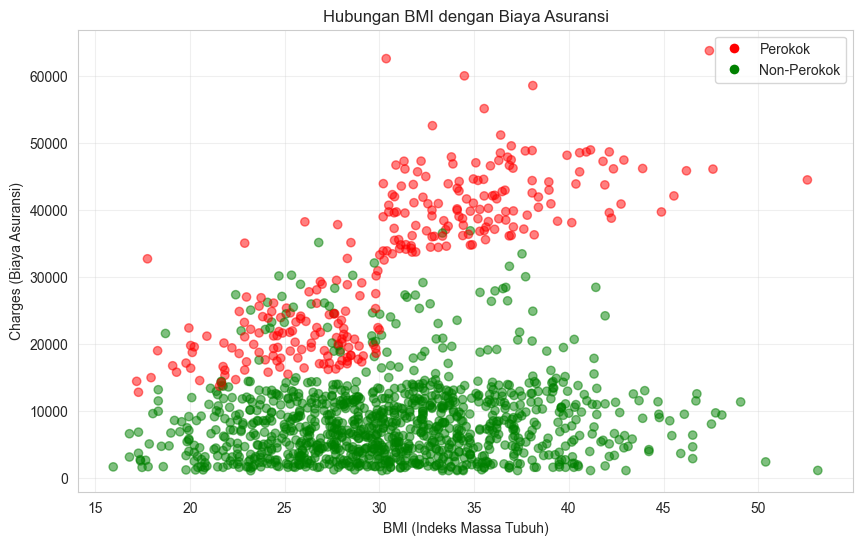

In [9]:
#Analisis BMI vs Charges
plt.figure(figsize=(10, 6))
colors = df['smoker'].map({'yes': 'red', 'no': 'green'})
plt.scatter(df['bmi'], df['charges'], c=colors, alpha=0.5)
plt.xlabel('BMI (Indeks Massa Tubuh)')
plt.ylabel('Charges (Biaya Asuransi)')
plt.title('Hubungan BMI dengan Biaya Asuransi')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w',
               markerfacecolor='red', label='Perokok', markersize=8),
    plt.Line2D([0], [0], marker='o', color='w',
               markerfacecolor='green', label='Non-Perokok', markersize=8)
])
plt.grid(True, alpha=0.3)
plt.show()

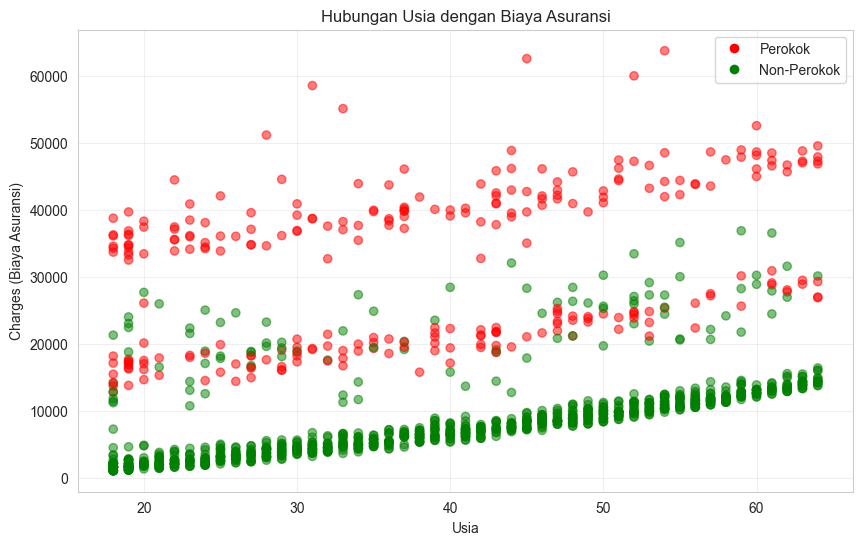

In [10]:
#Analisis Age vs Charges
plt.figure(figsize=(10, 6))
colors = df['smoker'].map({'yes': 'red', 'no': 'green'})
plt.scatter(df['age'], df['charges'], c=colors, alpha=0.5)
plt.xlabel('Usia')
plt.ylabel('Charges (Biaya Asuransi)')
plt.title('Hubungan Usia dengan Biaya Asuransi')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w',
               markerfacecolor='red', label='Perokok', markersize=8),
    plt.Line2D([0], [0], marker='o', color='w',
               markerfacecolor='green', label='Non-Perokok', markersize=8)
])
plt.grid(True, alpha=0.3)
plt.show()

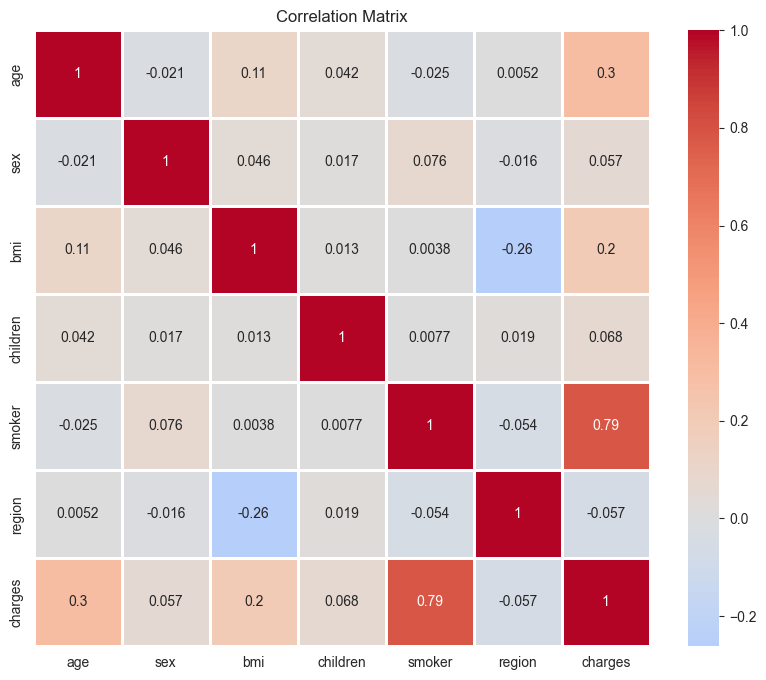

Korelasi dengan Charges:
charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.056993
Name: charges, dtype: float64


In [11]:
# Cell 10: Correlation Matrix
# Buat copy dataframe untuk encoding
df_encoded = df.copy()
df_encoded['sex'] = df_encoded['sex'].map({'male': 1, 'female': 0})
df_encoded['smoker'] = df_encoded['smoker'].map({'yes': 1, 'no': 0})
df_encoded['region'] = df_encoded['region'].map({
    'southeast': 1,
    'southwest': 2,
    'northeast': 3,
    'northwest': 4
})

plt.figure(figsize=(10, 8))
correlation = df_encoded.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1)
plt.title('Correlation Matrix')
plt.show()

print("Korelasi dengan Charges:")
print(correlation['charges'].sort_values(ascending=False))

In [12]:
# Feature Engineering - Encoding
from sklearn.preprocessing import LabelEncoder

# Buat copy untuk modeling
df_model = df.copy()

# Encode categorical variables
le_sex = LabelEncoder()
le_smoker = LabelEncoder()
le_region = LabelEncoder()

df_model['sex'] = le_sex.fit_transform(df_model['sex'])
df_model['smoker'] = le_smoker.fit_transform(df_model['smoker'])
df_model['region'] = le_region.fit_transform(df_model['region'])

print("Data setelah encoding:")
print(df_model.head())
print("\nMapping:")
print(f"Sex: {dict(zip(le_sex.classes_, le_sex.transform(le_sex.classes_)))}")
print(f"Smoker: {dict(zip(le_smoker.classes_, le_smoker.transform(le_smoker.classes_)))}")
print(f"Region: {dict(zip(le_region.classes_, le_region.transform(le_region.classes_)))}")

Data setelah encoding:
   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520

Mapping:
Sex: {'female': np.int64(0), 'male': np.int64(1)}
Smoker: {'no': np.int64(0), 'yes': np.int64(1)}
Region: {'northeast': np.int64(0), 'northwest': np.int64(1), 'southeast': np.int64(2), 'southwest': np.int64(3)}


In [13]:
# Split Data untuk Training dan Testing
# Pisahkan fitur (X) dan target (y)
X = df_model.drop('charges', axis=1)
y = df_model['charges']

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Data Training: {X_train.shape[0]} baris")
print(f"Data Testing: {X_test.shape[0]} baris")
print(f"\nFitur yang digunakan: {list(X.columns)}")

Data Training: 1070 baris
Data Testing: 268 baris

Fitur yang digunakan: ['age', 'sex', 'bmi', 'children', 'smoker', 'region']


In [14]:
# Cell 13: Model 1 - Linear Regression
print("=" * 50)
print("MODEL 1: LINEAR REGRESSION")
print("=" * 50)

# Train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Prediksi
y_pred_lr = lr_model.predict(X_test)

# Evaluasi
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f"MAE (Mean Absolute Error): ${mae_lr:.2f}")
print(f"RMSE (Root Mean Squared Error): ${rmse_lr:.2f}")
print(f"R² Score: {r2_lr:.4f} ({r2_lr*100:.2f}%)")
print("\nInterpretasi R²:")
print(f"Model dapat menjelaskan {r2_lr*100:.2f}% variasi dalam data")

MODEL 1: LINEAR REGRESSION
MAE (Mean Absolute Error): $4186.51
RMSE (Root Mean Squared Error): $5799.59
R² Score: 0.7833 (78.33%)

Interpretasi R²:
Model dapat menjelaskan 78.33% variasi dalam data


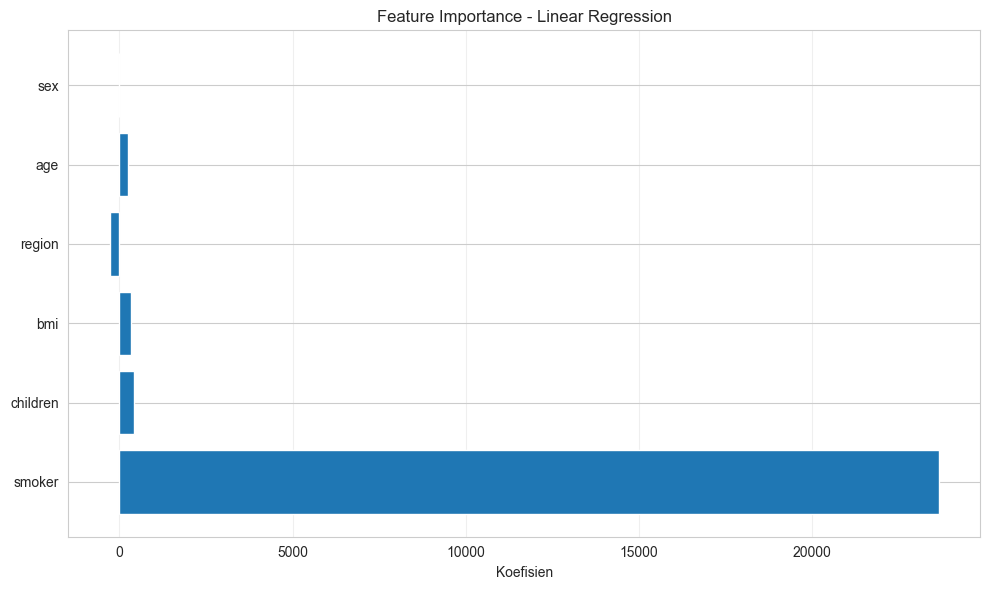

    Feature   Coefficient
4    smoker  23647.818096
3  children    425.091456
2       bmi    335.781491
5    region   -271.284266
0       age    257.056264
1       sex    -18.791457


In [15]:
# Feature Importance - Linear Regression
# Koefisien dari Linear Regression
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
})
coef_df = coef_df.sort_values('Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel('Koefisien')
plt.title('Feature Importance - Linear Regression')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print(coef_df)

In [16]:
# Model 2 - Random Forest Regression
print("=" * 50)
print("MODEL 2: RANDOM FOREST REGRESSION")
print("=" * 50)

# Train model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Prediksi
y_pred_rf = rf_model.predict(X_test)

# Evaluasi
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"MAE (Mean Absolute Error): ${mae_rf:.2f}")
print(f"RMSE (Root Mean Squared Error): ${rmse_rf:.2f}")
print(f"R² Score: {r2_rf:.4f} ({r2_rf*100:.2f}%)")
print("\nInterpretasi R²:")
print(f"Model dapat menjelaskan {r2_rf*100:.2f}% variasi dalam data")

MODEL 2: RANDOM FOREST REGRESSION
MAE (Mean Absolute Error): $2533.67
RMSE (Root Mean Squared Error): $4590.57
R² Score: 0.8643 (86.43%)

Interpretasi R²:
Model dapat menjelaskan 86.43% variasi dalam data


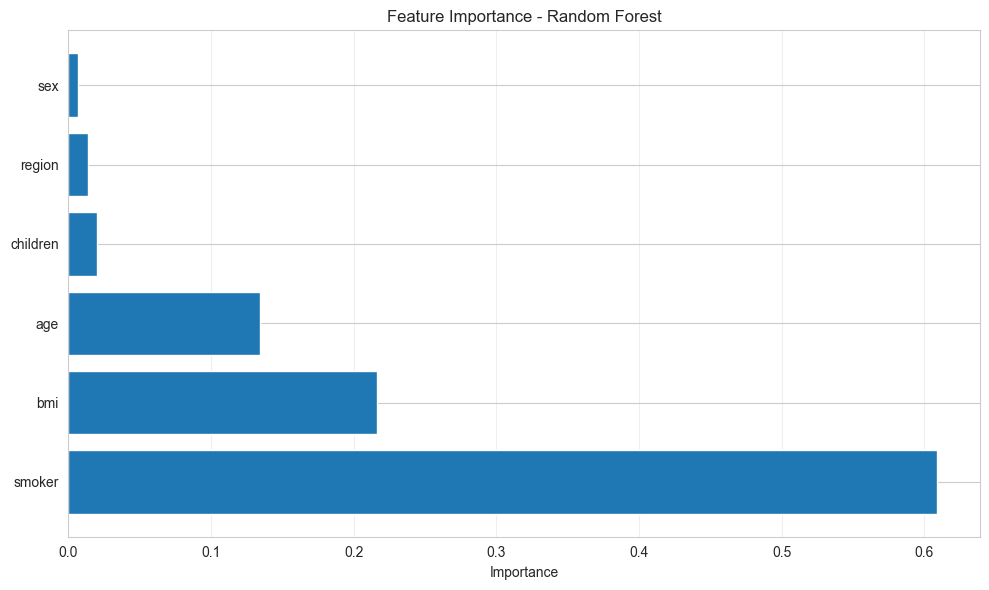

    Feature  Importance
4    smoker    0.608618
2       bmi    0.216291
0       age    0.134554
3  children    0.020199
5    region    0.013926
1       sex    0.006412


In [17]:
# Cell 16: Feature Importance - Random Forest
# Feature importance dari Random Forest
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})
importance_df = importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print(importance_df)

In [18]:
# Perbandingan Model
print("=" * 60)
print("PERBANDINGAN MODEL")
print("=" * 60)

comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MAE': [mae_lr, mae_rf],
    'RMSE': [rmse_lr, rmse_rf],
    'R² Score': [r2_lr, r2_rf]
})

print(comparison)
print("\n" + "=" * 60)

# Tentukan model terbaik
if r2_rf > r2_lr:
    print("🏆 Model Terbaik: Random Forest")
    best_model = rf_model
    best_pred = y_pred_rf
else:
    print("🏆 Model Terbaik: Linear Regression")
    best_model = lr_model
    best_pred = y_pred_lr

PERBANDINGAN MODEL
               Model          MAE         RMSE  R² Score
0  Linear Regression  4186.508898  5799.587091  0.783346
1      Random Forest  2533.674644  4590.573539  0.864261

🏆 Model Terbaik: Random Forest


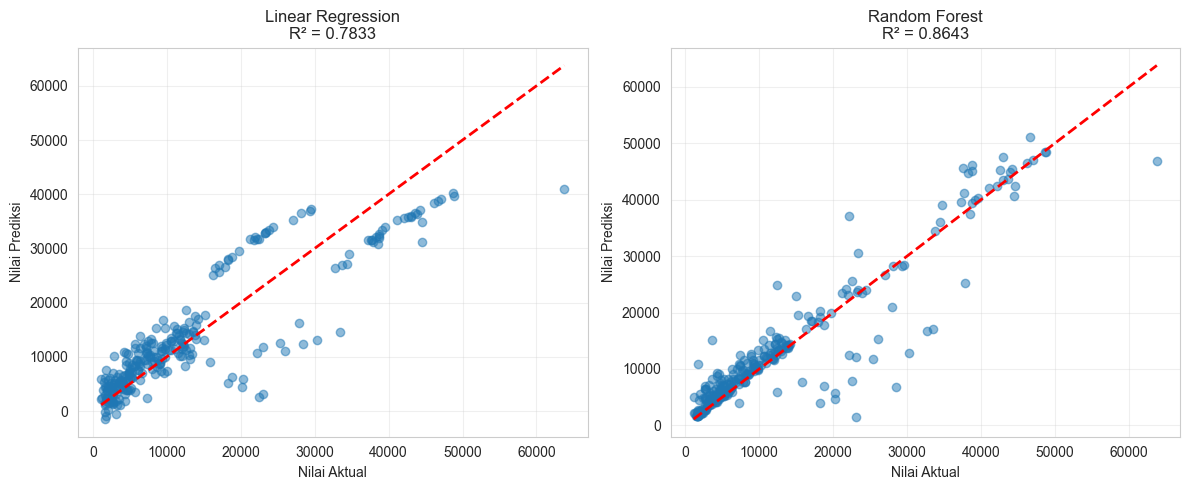

In [19]:
# Visualisasi Prediksi vs Aktual
plt.figure(figsize=(12, 5))

# Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title(f'Linear Regression\nR² = {r2_lr:.4f}')
plt.grid(True, alpha=0.3)

# Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title(f'Random Forest\nR² = {r2_rf:.4f}')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [20]:
# Cell 19: Prediksi untuk Data Baru
def predict_charges(age, sex, bmi, children, smoker, region):
    """
    Fungsi untuk memprediksi biaya asuransi
    
    Parameters:
    - age: int (usia)
    - sex: str ('male' atau 'female')
    - bmi: float (indeks massa tubuh)
    - children: int (jumlah anak)
    - smoker: str ('yes' atau 'no')
    - region: str ('southeast', 'southwest', 'northeast', 'northwest')
    """
    # Encode input
    sex_encoded = le_sex.transform([sex])[0]
    smoker_encoded = le_smoker.transform([smoker])[0]
    region_encoded = le_region.transform([region])[0]

    # Buat dataframe input
    input_data = pd.DataFrame({
        'age': [age],
        'sex': [sex_encoded],
        'bmi': [bmi],
        'children': [children],
        'smoker': [smoker_encoded],
        'region': [region_encoded]
    })

    # Prediksi menggunakan Random Forest (model terbaik)
    prediction = rf_model.predict(input_data)[0]

    print("=" * 50)
    print("PREDIKSI BIAYA ASURANSI")
    print("=" * 50)
    print(f"Usia: {age} tahun")
    print(f"Jenis Kelamin: {sex}")
    print(f"BMI: {bmi}")
    print(f"Jumlah Anak: {children}")
    print(f"Perokok: {smoker}")
    print(f"Region: {region}")
    print("=" * 50)
    print(f"💰 Estimasi Biaya: ${prediction:,.2f}")
    print("=" * 50)

    return prediction

In [21]:
# Contoh penggunaan
print("Contoh 1: Pria 35 tahun, perokok")
predict_charges(age=35, sex='male', bmi=28, children=2,
                smoker='yes', region='southeast')

print("\n")

print("Contoh 2: Wanita 30 tahun, tidak merokok")
predict_charges(age=30, sex='female', bmi=25, children=1,
                smoker='no', region='northwest')

Contoh 1: Pria 35 tahun, perokok
PREDIKSI BIAYA ASURANSI
Usia: 35 tahun
Jenis Kelamin: male
BMI: 28
Jumlah Anak: 2
Perokok: yes
Region: southeast
💰 Estimasi Biaya: $19,768.68


Contoh 2: Wanita 30 tahun, tidak merokok
PREDIKSI BIAYA ASURANSI
Usia: 30 tahun
Jenis Kelamin: female
BMI: 25
Jumlah Anak: 1
Perokok: no
Region: northwest
💰 Estimasi Biaya: $5,762.67


np.float64(5762.672248900006)

In [22]:
# Cell 20: Kesimpulan
print("=" * 70)
print("KESIMPULAN ANALISIS")
print("=" * 70)
print("\n📊 Insight dari Data:")
print("-" * 70)
print("1. Status merokok adalah faktor TERBESAR yang mempengaruhi biaya")
print("2. Perokok membayar rata-rata 3-4x lebih mahal dari non-perokok")
print("3. Usia dan BMI juga berpengaruh signifikan")
print("4. Jumlah anak dan region memiliki pengaruh yang lebih kecil")

print("\n🤖 Performa Model:")
print("-" * 70)
print(f"✓ Random Forest adalah model terbaik dengan R² = {r2_rf:.4f}")
print(f"✓ Model dapat memprediksi dengan akurasi {r2_rf*100:.2f}%")
print(f"✓ Error rata-rata: ${mae_rf:.2f}")

print("\n💡 Rekomendasi:")
print("-" * 70)
print("1. Model ini bisa digunakan untuk estimasi biaya asuransi")
print("2. Untuk meningkatkan akurasi, coba model ensemble lain (XGBoost)")
print("3. Pertimbangkan feature engineering tambahan")
print("=" * 70)

KESIMPULAN ANALISIS

📊 Insight dari Data:
----------------------------------------------------------------------
1. Status merokok adalah faktor TERBESAR yang mempengaruhi biaya
2. Perokok membayar rata-rata 3-4x lebih mahal dari non-perokok
3. Usia dan BMI juga berpengaruh signifikan
4. Jumlah anak dan region memiliki pengaruh yang lebih kecil

🤖 Performa Model:
----------------------------------------------------------------------
✓ Random Forest adalah model terbaik dengan R² = 0.8643
✓ Model dapat memprediksi dengan akurasi 86.43%
✓ Error rata-rata: $2533.67

💡 Rekomendasi:
----------------------------------------------------------------------
1. Model ini bisa digunakan untuk estimasi biaya asuransi
2. Untuk meningkatkan akurasi, coba model ensemble lain (XGBoost)
3. Pertimbangkan feature engineering tambahan
